In [24]:
# how load_manual_data file looks like
# Open this file: challenge-icml-2024/datasets/graph/toy_dataset/manual/processed/data.pt

import torch

# Specify the path to your .pt file
file_path = 'datasets/graph/toy_dataset/manual/processed/data_or.pt'

# Load the .pt file
data = torch.load(file_path)

# Print the contents of the loaded data
print(data)


({'x': tensor([[1.0000e+00],
        [5.0000e+00],
        [1.0000e+01],
        [5.0000e+01],
        [1.0000e+02],
        [5.0000e+02],
        [1.0000e+03],
        [5.0000e+03]]), 'edge_index': tensor([[0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 5, 5],
        [1, 2, 4, 7, 2, 4, 3, 5, 7, 4, 6, 6, 7]]), 'y': tensor([0, 1, 1, 1, 0, 0, 0, 0]), 'num_nodes': 8}, None, <class 'torch_geometric.data.data.Data'>)


In [3]:
from rdkit import Chem
from rdkit.Chem import rdchem
import torch
from torch_geometric.data import Data

# Define the SMILES string for phenylalanine
smiles = "C1=CC=C(C=C1)C[C@@H](C(=O)O)N"

# Convert the SMILES string to an RDKit molecule object
mol = Chem.MolFromSmiles(smiles)

# Create atom features (node features)
atom_types = {'C': 0, 'H': 1, 'N': 2, 'O': 3}
atom_list = [atom_types[atom.GetSymbol()] for atom in mol.GetAtoms()]
x = torch.tensor(atom_list, dtype=torch.long).view(-1, 1)

# Create edge index
edges = []
for bond in mol.GetBonds():
    i = bond.GetBeginAtomIdx()
    j = bond.GetEndAtomIdx()
    edges.append((i, j))
    edges.append((j, i))

edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()

# Create the PyTorch Geometric data object
data = Data(x=x, edge_index=edge_index)

print(data)


Data(x=[12, 1], edge_index=[2, 24])


In [35]:
# With this cell any imported module is reloaded before each cell execution
%load_ext autoreload
%autoreload 2
from modules.data.load.loaders import GraphLoader
from modules.data.preprocess.preprocessor import PreProcessor
from modules.utils.utils import (
    describe_data,
    load_dataset_config,
    load_model_config,
    load_transform_config,
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
dataset_name = "QM9"
dataset_config = load_dataset_config(dataset_name)
loader = GraphLoader(dataset_config)


Dataset configuration for QM9:

{'data_domain': 'graph',
 'data_type': 'QM9',
 'data_name': 'QM9',
 'data_dir': 'datasets/graph/QM9',
 'num_features': 11,
 'num_classes': 1,
 'task': 'regression',
 'loss_type': 'mse',
 'monitor_metric': 'mae',
 'task_level': 'graph'}



Dataset contains 129428 samples.

Providing more details about sample 0/129428:


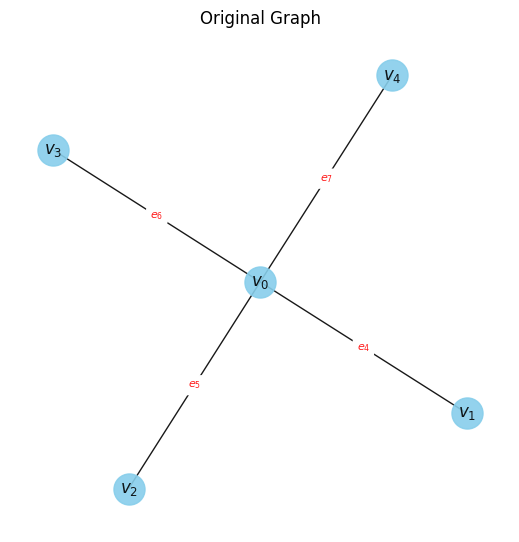

 - Graph with 5 vertices and 8 edges.
 - Features dimensions: [11, 5]
 - There are 0 isolated nodes.



In [37]:
dataset = loader.load()
describe_data(dataset)

In [38]:
dataset[471]

Data(x=[12, 11], edge_index=[2, 26], edge_attr=[26, 5], y=[1, 19], pos=[12, 3], z=[12], smiles='[H]O[C@@]12C([H])([H])O[C@]1([H])C2([H])[H]', name='gdb_483', idx=[1])

In [39]:
dataset[471].num_nodes

12

In [40]:
x=dataset[471].x
edge_index=dataset[471].edge_index
y=dataset[471].y
num_nodes=dataset[471].num_nodes
smiles=dataset[471].smiles

In [41]:
dataset[471].pos

tensor([[-0.0520,  1.4421,  0.0438],
        [-0.0146,  0.0641,  0.0278],
        [-0.2878, -0.7834, -1.1968],
        [-1.1365, -0.9394,  0.0399],
        [-0.4768, -1.7722,  0.9962],
        [ 0.6009, -0.8025,  1.1266],
        [ 0.6168,  1.7721, -0.5660],
        [-0.7693, -0.2348, -2.0014],
        [ 0.3816, -1.5834, -1.5029],
        [-2.2159, -0.8594,  0.0798],
        [ 1.5885, -1.2463,  0.9538],
        [ 0.5680, -0.3171,  2.1084]])

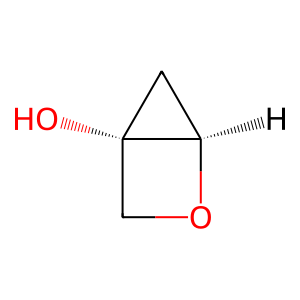

In [42]:
# draw toy_dataset graph
toy_dataset = dataset[471]

from rdkit import Chem
from rdkit.Chem import Draw

Draw.MolToImage(Chem.MolFromSmiles(smiles))

In [43]:
toy_dataset = ({'x': x, 'edge_index': edge_index, 'y': y, 'num_nodes': num_nodes})

In [44]:
from torch_geometric.data import Data

toy_dataset = Data(x=dataset[471].x.to_dense(), 
        edge_index=dataset[471].edge_index, 
        smiles=dataset[471].smiles,
        y=dataset[471].y,
        num_nodes=dataset[471].num_nodes)

In [45]:
# apply cell ring lifting

from modules.transforms.liftings.graph2cell.ring_lifting import CellRingLifting

ring_lifting = CellRingLifting()

toy_dataset = ring_lifting(toy_dataset)

# print incidence_1 and incidence_2
print(toy_dataset.incidence_1)

print(toy_dataset.incidence_2)

tensor(indices=tensor([[ 0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  3,  3,  3,
                         3,  4,  4,  4,  5,  5,  5,  5,  6,  7,  8,  9, 10, 11],
                       [ 0,  1,  0,  2,  3,  4,  5,  2,  6,  7,  8,  3,  6,  9,
                        10,  4,  9, 11,  5, 11, 12, 13,  1,  7,  8, 10, 12, 13]]),
       values=tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
                      1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
       size=(12, 14), nnz=28, layout=torch.sparse_coo)
tensor(indices=tensor([[ 2,  4,  4,  5,  6,  9, 11],
                       [ 0,  0,  1,  1,  0,  0,  1]]),
       values=tensor([1., 1., 1., 1., 1., 1., 1.]),
       size=(14, 2), nnz=7, layout=torch.sparse_coo)


/home/bmiquel/miniconda3/envs/topox/lib/python3.11/site-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [57]:
toy_dataset.incidence_2.to_dense()

tensor([[0., 0.],
        [0., 0.],
        [1., 0.],
        [0., 0.],
        [1., 1.],
        [0., 1.],
        [1., 0.],
        [0., 0.],
        [0., 0.],
        [1., 0.],
        [0., 0.],
        [0., 1.],
        [0., 0.],
        [0., 0.]])

In [46]:
# search phenylalanine in the dataset through the SMILES string
phenylalanine_smiles = "C1=CC=C(C=C1)C[C@@H](C(=O)O)N"

for i, smiles in enumerate(dataset.smiles):
    if smiles == phenylalanine_smiles:
        print(f"Phenylalanine found at index {i}")
        break

In [47]:
"""Test the message passing module."""

import torch

from modules.data.utils.utils import load_manual_graph
from modules.transforms.liftings.graph2cell.ring_lifting import CellRingLifting

from torch_geometric.data import Data

from rdkit import Chem


class TestCellRingLifting:
    """Test the CellRingLifting class."""

    def setup_method(self):
        # Load the graph
        self.data = load_manual_graph()
        

        # Initialise the CellCyclesLifting class
        self.lifting = CellRingLifting()    

    def test_lift_topology(self):
        # Test the lift_topology method
        lifted_data = self.lifting.forward(self.data.clone())

        expected_incidence_1 = torch.tensor(
            [
                [1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                [1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
                [0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
                [0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0.],
                [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1.],
                [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.],
                [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
                [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
                [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
                [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
                [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]
            ]
        )

        assert (
            expected_incidence_1 == lifted_data.incidence_1.to_dense()
        ).all(), "Something is wrong with incidence_1."

        expected_incidence_2 = torch.tensor(
            [
                [0., 0.],
                [0., 0.],
                [0., 0.],
                [0., 0.],
                [1., 0.],
                [1., 1.],
                [0., 0.],
                [0., 1.],
                [1., 0.],
                [0., 0.],
                [0., 0.],
                [0., 1.],
                [0., 0.],
                [0., 0.],
                [0., 1.],
                [0., 0.]
            ]
        )

        assert (
            expected_incidence_2 == lifted_data.incidence_2.to_dense()
        ).all(), "Something is wrong with incidence_2."


In [48]:
import torch_geometric

data_type= 'QM9'
data_name= 'QM9'
data_dir= 'datasets/${data_domain}/${data_type}'

root_data_dir = data_dir.replace('${data_domain}', 'graph').replace('${data_type}', data_type)


dataset = torch_geometric.datasets.QM9(
                root=root_data_dir, 
                pre_transform=torch_geometric.transforms.Distance(norm=False),
                force_reload=True
            )

Processing...
 30%|██▉       | 39752/133885 [00:21<00:50, 1873.74it/s]


KeyboardInterrupt: 

In [ ]:
toy_data = dataset[0]

In [ ]:
toy_data.pos

tensor([[-1.2700e-02,  1.0858e+00,  8.0000e-03],
        [ 2.2000e-03, -6.0000e-03,  2.0000e-03],
        [ 1.0117e+00,  1.4638e+00,  3.0000e-04],
        [-5.4080e-01,  1.4475e+00, -8.7660e-01],
        [-5.2380e-01,  1.4379e+00,  9.0640e-01]])

In [ ]:
# I want to compute the euclidean distance between each atom
# I will use the pos attribute of the toy_data object

import torch

# Get the positions of the atoms
pos = toy_data.pos

# Compute the pairwise distances between the atoms
distances = torch.cdist(pos, pos, p=2)

# Print the computed distances
print(distances)

tensor([[0.0000, 1.0919, 1.0919, 1.0919, 1.0919],
        [1.0919, 0.0000, 1.7831, 1.7831, 1.7831],
        [1.0919, 1.7831, 0.0000, 1.7831, 1.7831],
        [1.0919, 1.7831, 1.7831, 0.0000, 1.7831],
        [1.0919, 1.7831, 1.7831, 1.7831, 0.0000]])


In [ ]:
    import networkx as nx

    def get_distance_matrix(
        data : torch_geometric.data.Data | dict
    ) -> torch.Tensor:
        r"""Computes the pairwise distances between atoms in a molecule.

        Parameters
        ----------
        mol : Chem.Mol
            The molecule object.

        Returns
        -------
        torch.Tensor
            The pairwise distance matrix.
        """
        # Get the positions of the atoms
        pos = data.pos

        # Compute the pairwise distances between the atoms
        distances = torch.cdist(pos, pos, p=2)

        return distances
    
    def find_close_atoms(
            data : torch_geometric.data.Data | dict #, threshold_distance: float
        ) -> list:
        r"""Finds the atoms that are close to each other within a molecule.

        Parameters
        ----------
        mol : Chem.Mol

        threshold_distance : float
            The threshold distance to consider two atoms as close.

        Returns
        -------
        list
            The list of close atoms.
        """
        # Get the distances between atoms including in transormed data
        distance_matrix = get_distance_matrix(data)

        # Get indices of atom pairs that are closer than the threshold
        close_atoms = []
        num_atoms = distance_matrix.size(0) # data.num_nodes
        for i in range(num_atoms):
            for j in range(i + 1, num_atoms):
                if distance_matrix[i, j] < 1.5:
                    close_atoms.append((i, j))
        
        return close_atoms      #, distance_matrix
    
    def find_close_atom_groups(
        data : torch_geometric.data.Data | dict
    ) -> list:
        r"""Finds the groups of atoms that are close to each other within a molecule.

        Parameters
        ----------
        mol : Chem.Mol

        threshold_distance : float
            The threshold distance to consider two atoms as close.

        Returns
        -------
        list
            The list of groups of close atoms.
        """
        # Get the indices of close atoms
        close_atoms = find_close_atoms(data)

        G = nx.Graph()
        G.add_edges_from(close_atoms)
        return [list(component) for component in nx.connected_components(G)]

In [ ]:
toy = dataset[471]

In [ ]:
toy.z

tensor([6, 6, 6, 6, 6, 8, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
toy.edge_index

tensor([[ 0,  0,  0,  0,  1,  1,  1,  1,  2,  2,  2,  2,  3,  3,  3,  3,  4,  4,
          4,  4,  5,  5,  6,  7,  8,  9, 10, 11, 12, 13],
        [ 1,  6,  7,  8,  0,  2,  4,  5,  1,  3,  9, 10,  2,  4, 11, 12,  1,  3,
          5, 13,  1,  4,  0,  0,  0,  2,  2,  3,  3,  4]])

In [ ]:
toy.num_nodes

14

In [ ]:
find_close_atoms(toy)

[(0, 1),
 (0, 6),
 (0, 7),
 (0, 8),
 (1, 4),
 (1, 5),
 (2, 9),
 (2, 10),
 (3, 11),
 (3, 12),
 (4, 5),
 (4, 13)]

In [ ]:
find_close_atom_groups(toy)

[[0, 1, 4, 5, 6, 7, 8, 13], [9, 2, 10], [11, 3, 12]]

In [ ]:
toy

Data(x=[14, 11], edge_index=[2, 30], edge_attr=[30, 5], y=[1, 19], pos=[14, 3], z=[14], smiles='[H]C([H])([H])[C@@]12O[C@]1([H])C([H])([H])C2([H])[H]', name='gdb_481', idx=[1])

In [ ]:
smiles='[H]C1([H])[N@H+]2[C@@]3([H])[C@@]14O[C@@]1([H])[C@@]([H])([C@]24[H])[C@]13[H]'

In [ ]:
from rdkit import Chem

# remove hydrogens from the SMILES string
mol = Chem.MolFromSmiles(smiles)
# mol = Chem.RemoveHs(mol)

In [ ]:
# convert the molecule to a SMILES string
smiles = Chem.MolToSmiles(mol)
smiles

'C1[N@@H+]2[C@H]3[C@@H]4[C@@H]5O[C@]13[C@H]2[C@@H]54'

In [ ]:
# create a function that computes the distance between all atoms inside a molecule
from rdkit.Chem import AllChem
from rdkit import RDLogger

# Suppress RDKit warnings
RDLogger.DisableLog('rdApp.*')

def generateMolFromSmiles(smiles):
    m = Chem.MolFromSmiles(smiles)
    if m is None:
        raise ValueError("Invalid SMILES string")
    m = Chem.AddHs(m)
    result = AllChem.EmbedMolecule(m, randomSeed=27)
    if result != 0:
        raise ValueError("Embedding failed")
    result = AllChem.MMFFOptimizeMolecule(m)
    if result != 0:
        raise ValueError("Optimization failed")
    return m

def getDistOfMol( smiles ):
    m = generateMolFromSmiles( smiles )
    distMat = Chem.Get3DDistanceMatrix(m)
    return distMat

def compute_distance_matrix(mol):
    # Generate 3D coordinates if they don't exist
    # if not mol.GetNumConformers():
    #     AllChem.EmbedMolecule(mol, randomSeed=42)
    #     AllChem.UFFOptimizeMolecule(mol)
    
    # Compute the distance matrix
    dist_mat = AllChem.Get3DDistanceMatrix(mol)
    return dist_mat

def get_atoms_within_threshold(dist_mat, threshold):
    # Get the number of atoms in the molecule
    num_atoms = dist_mat.shape[0]
    
    # Find pairs of atoms closer than the threshold
    close_atoms = []
    for i in range(num_atoms):
        for j in range(i + 1, num_atoms):
            if dist_mat[i, j] < threshold:
                close_atoms.append((i, j))
    
    return close_atoms
    

In [ ]:
try:
    distMat = getDistOfMol(smiles)
    print("Distance matrix:")
    print(distMat)  # full matrix of numOfAtoms x numOfAtoms
    print(f"Distance between atom 0 and atom 2: {distMat[0, 2]} Å")  # distance between atom 0 and atom 2
except ValueError as e:
    print(f"Error: {e}")

Error: Embedding failed


In [ ]:
distMat  = getDistOfMol( smiles )
print( distMat ) # full matrix of numOfAtoms x numOfAtoms
print( distMat[0,2] ) # distance between atom 0 and atom 2

ValueError: Bad Conformer Id

In [ ]:
AllChem.EmbedMolecule(mol, randomSeed=42)  # Ensure the molecule has 3D coordinates
dist_mat = compute_distance_matrix(mol)

threshold = 12  # Example threshold distance
close_atoms = get_atoms_within_threshold(dist_mat, threshold)

print("Atom pairs closer than the threshold distance:")
for pair in close_atoms:
    print(f"Atom {pair[0]} and Atom {pair[1]} are {dist_mat[pair[0], pair[1]]:.2f} Å apart.")


ValueError: Bad Conformer Id

# Load protein dataset